<a href="https://colab.research.google.com/github/StefanHubner/MachineLearningEconomics/blob/main/LogitNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This takes about 9-10 minutes

Sys.setenv("CUDA" = "cpu")
Sys.setenv("TORCH_INSTALL" = "1")
install.packages("torch", reinstall = FALSE)
torch::install_torch()

library(torch)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("IRdisplay")
library(IRdisplay)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ISLR")
library(ISLR)

data("Default")
Default$default1 <- as.double(Default$default == "Yes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



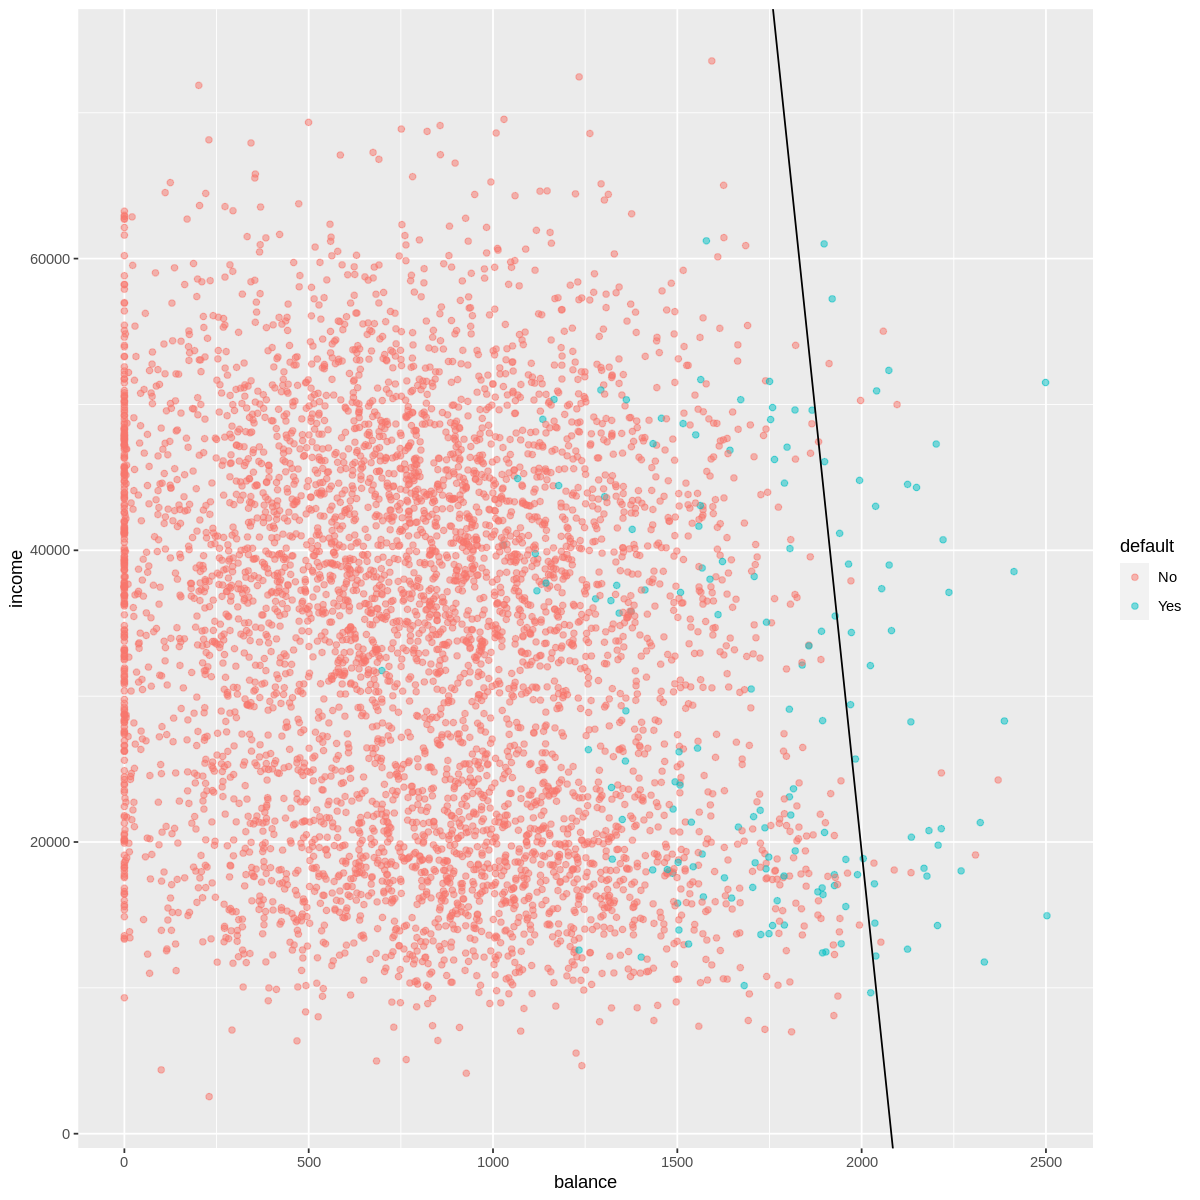

In [ ]:
library(ggplot2)

options(repr.plot.width = 10, repr.plot.height = 10)

n <- nrow(Default)
traini <- sample(1:n, n/2)
testi <- -traini

train <- Default[traini,]

# From Logit estimation in Classification Chapter
blogit <- c(-11.1437010201259, 0.0053562007038889, 2.22954252823084e-05)

p0 <- ggplot(Default[testi,], aes(y = income, x = balance, color = default)) +
        geom_point(alpha = 0.5) +
        geom_abline(intercept = -blogit[1]/blogit[3], slope = -blogit[2]/blogit[3])

p0

In [ ]:
# The "modern" way

y <- torch_tensor(y1, requires_grad = TRUE)
x <- torch_tensor(x1x2[,-1], requires_grad = TRUE) # no intercept, "bias" is explicit

# Define single-layer neural network (logistic regression)
model <- nn_module(
  "LogitModel",
  initialize = function(input_dim, output_dim) {
    self$linear <- nn_linear(input_dim, output_dim)
  },
  forward = function(x) {
    x %>% self$linear() %>% nnf_sigmoid()
  }
)

# Initialize model and optimizer
input_dim <- x$size()[2]
output_dim <- 1

net <- model(input_dim, output_dim)
optimizer <- optim_adam(net$parameters)

# Training settings
epochs <- 50000
loss_function <- nn_bce_loss() # binary cross entropy

# Training loop
for(epoch in 1:epochs) {
  optimizer$zero_grad()
  output <- net(x)
  loss <- loss_function(output$squeeze(), y)
  loss$backward()
  optimizer$step()
  if (epoch %% (epochs / 50) == 0) # print a total of intermediate 50 steps
    display_html(sprintf("<tt>%d: %f</tt>", epoch, as.numeric(loss$detach())))
}

# View the learned parameters
print("Learned parameters:")
print(net$linear$weight)
print(net$linear$bias)

1000: 0.174209

2000: 0.170369

3000: 0.167209

4000: 0.162469

5000: 0.155835

6000: 0.147209

7000: 0.137054

8000: 0.126519

9000: 0.116807

10000: 0.108562

11000: 0.101893

12000: 0.096650

13000: 0.092610

14000: 0.089559

15000: 0.087310

16000: 0.085709

17000: 0.084626

18000: 0.083949

19000: 0.083576

20000: 0.083411

21000: 0.083361

22000: 0.083353

23000: 0.083353

24000: 0.083353

25000: 0.083353

26000: 0.083353

27000: 0.083353

28000: 0.083353

29000: 0.083353

30000: 0.083353

31000: 0.083353

32000: 0.083353

33000: 0.083353

34000: 0.083353

35000: 0.083353

36000: 0.083353

37000: 0.083353

38000: 0.083353

39000: 0.083353

40000: 0.083353

41000: 0.083353

42000: 0.083353

43000: 0.083353

44000: 0.083353

45000: 0.083353

46000: 0.083353

47000: 0.083353

48000: 0.083353

49000: 0.083353

50000: 0.083353

51000: 0.083353

52000: 0.083353

53000: 0.083353

54000: 0.083353

55000: 0.083353

56000: 0.083353

57000: 0.083353

58000: 0.083353

59000: 0.083353

60000: 0.083353

61000: 0.083353

62000: 0.083353

In [ ]:
# we have normalised X to 1000s of USD (currency)
bnn <- c(as.numeric(net$linear$bias$detach()), .001*as.numeric(net$linear$weight$detach()))

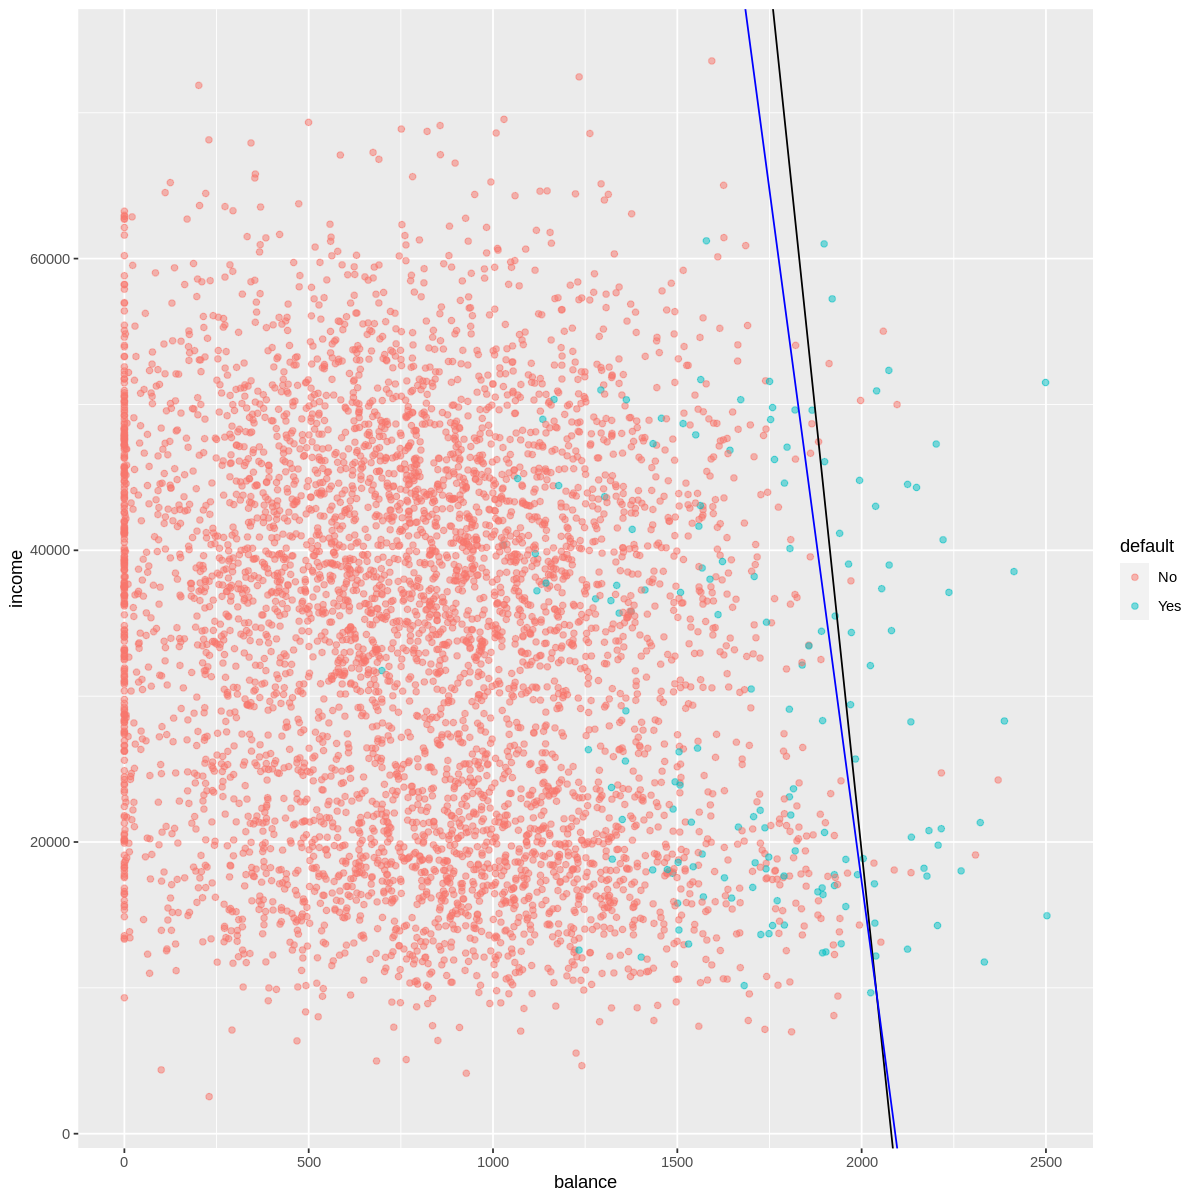

In [ ]:
p0 + geom_abline(intercept = -bnn[1]/bnn[3], slope = -bnn[2]/bnn[3], color = "blue")